In [33]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/Nlp project/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv', header=0)
df.drop(columns=['postalCode','city','latitude','longitude','dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'keys', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'], inplace = True)
df.head()


,id,country,name,province,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title
0,AWE2FvX5RxPSIh2RscTK,US,Best Western Plus South Coast Inn,CA,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel
1,AVwcj_OhkufWRAb5wi9T,US,Best Western Carmel's Town House Lodge,CA,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel
2,AVwcj_OhkufWRAb5wi9T,US,Best Western Carmel's Town House Lodge,CA,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business
3,AVwcj_OhkufWRAb5wi9T,US,Best Western Carmel's Town House Lodge,CA,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good
4,AVwcj_OhkufWRAb5wi9T,US,Best Western Carmel's Town House Lodge,CA,2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here


In [34]:
grouped = df.groupby('province')
df = grouped.get_group('VA')

In [35]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [36]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
for i in df['reviews.text']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        
    except:
        polarity.append(0)


In [37]:
df['polarity']=polarity

In [38]:
bins = [-1, -0.6, -0.2, 0.2, 0.6, 1]
names = ['1','2','3','4','5']
df['new_polarity'] = pd.cut(df['polarity'], bins, labels=names)

In [39]:
df1 = df[['reviews.text','province', 'polarity','new_polarity','reviews.rating']]
df1.head()

,reviews.text,province,polarity,new_polarity,reviews.rating
1116,MoreMore,VA,0.000000,3,4
1253,"I have travelled from Ontario, Canada to Best ...",VA,0.351515,4,5
1254,I visited this place last summer and it was on...,VA,0.395833,4,5
1255,The hotel was very nice and the breakfast was ...,VA,0.419750,4,4
1256,This hotel was so clean. So well kept. The val...,VA,0.212500,4,5


In [40]:
df1['new_polarity'] = df['new_polarity'].astype('int64')
accuracy = (len(df1[df1['new_polarity'] == df1['reviews.rating']])/len(df1)) * 100
print("All reviews accuracy in VA:", accuracy)

All reviews accuracy in VA: 17.796610169491526


In [41]:
#positive comments
pos_com= df[['reviews.text','province', 'polarity','new_polarity','reviews.rating']][df.polarity>0]
pos_com.head()

,reviews.text,province,polarity,new_polarity,reviews.rating
1253,"I have travelled from Ontario, Canada to Best ...",VA,0.351515,4,5
1254,I visited this place last summer and it was on...,VA,0.395833,4,5
1255,The hotel was very nice and the breakfast was ...,VA,0.419750,4,4
1256,This hotel was so clean. So well kept. The val...,VA,0.212500,4,5
1257,Stayed at this fine establishment for the seco...,VA,0.209524,4,5


In [42]:
pos_com.count()

reviews.text      107
province          107
polarity          107
new_polarity      107
reviews.rating    107
dtype: int64

In [43]:
pos_com['new_polarity'] = pos_com['new_polarity'].astype('int64')

In [44]:
accuracy = (sum(pos_com['new_polarity'] == pos_com['reviews.rating']))/107 * 100
print("positive reviews accuracy in VA:", accuracy)

positive reviews accuracy in VA: 17.75700934579439


In [45]:
#negative comments
neg_com = df[['reviews.text','province', 'polarity','new_polarity','reviews.rating']][df.polarity<0]
neg_com.head()

,reviews.text,province,polarity,new_polarity,reviews.rating
2808,"Very good experience. Disappointed, since my w...",VA,-0.196667,3,4
4396,I booked a kingsize non smoking room and put i...,VA,-0.112500,3,1
4398,This is a basic hotel at a basic price. Pillow...,VA,-0.075000,3,3
5356,This is the property that I rate all other Ham...,VA,-0.062500,3,5
5359,"the hotel is well kept. Slept well, no issues ...",VA,-0.062500,3,3


In [46]:
neg_com.count()

reviews.text      10
province          10
polarity          10
new_polarity      10
reviews.rating    10
dtype: int64

In [47]:
neg_com['new_polarity'] = neg_com['new_polarity'].astype('int64')
accuracy = (sum(neg_com['new_polarity'] == neg_com['reviews.rating']))/107 * 100
print("negative reviews accuracy in VA:", accuracy)

negative reviews accuracy in VA: 1.8691588785046727


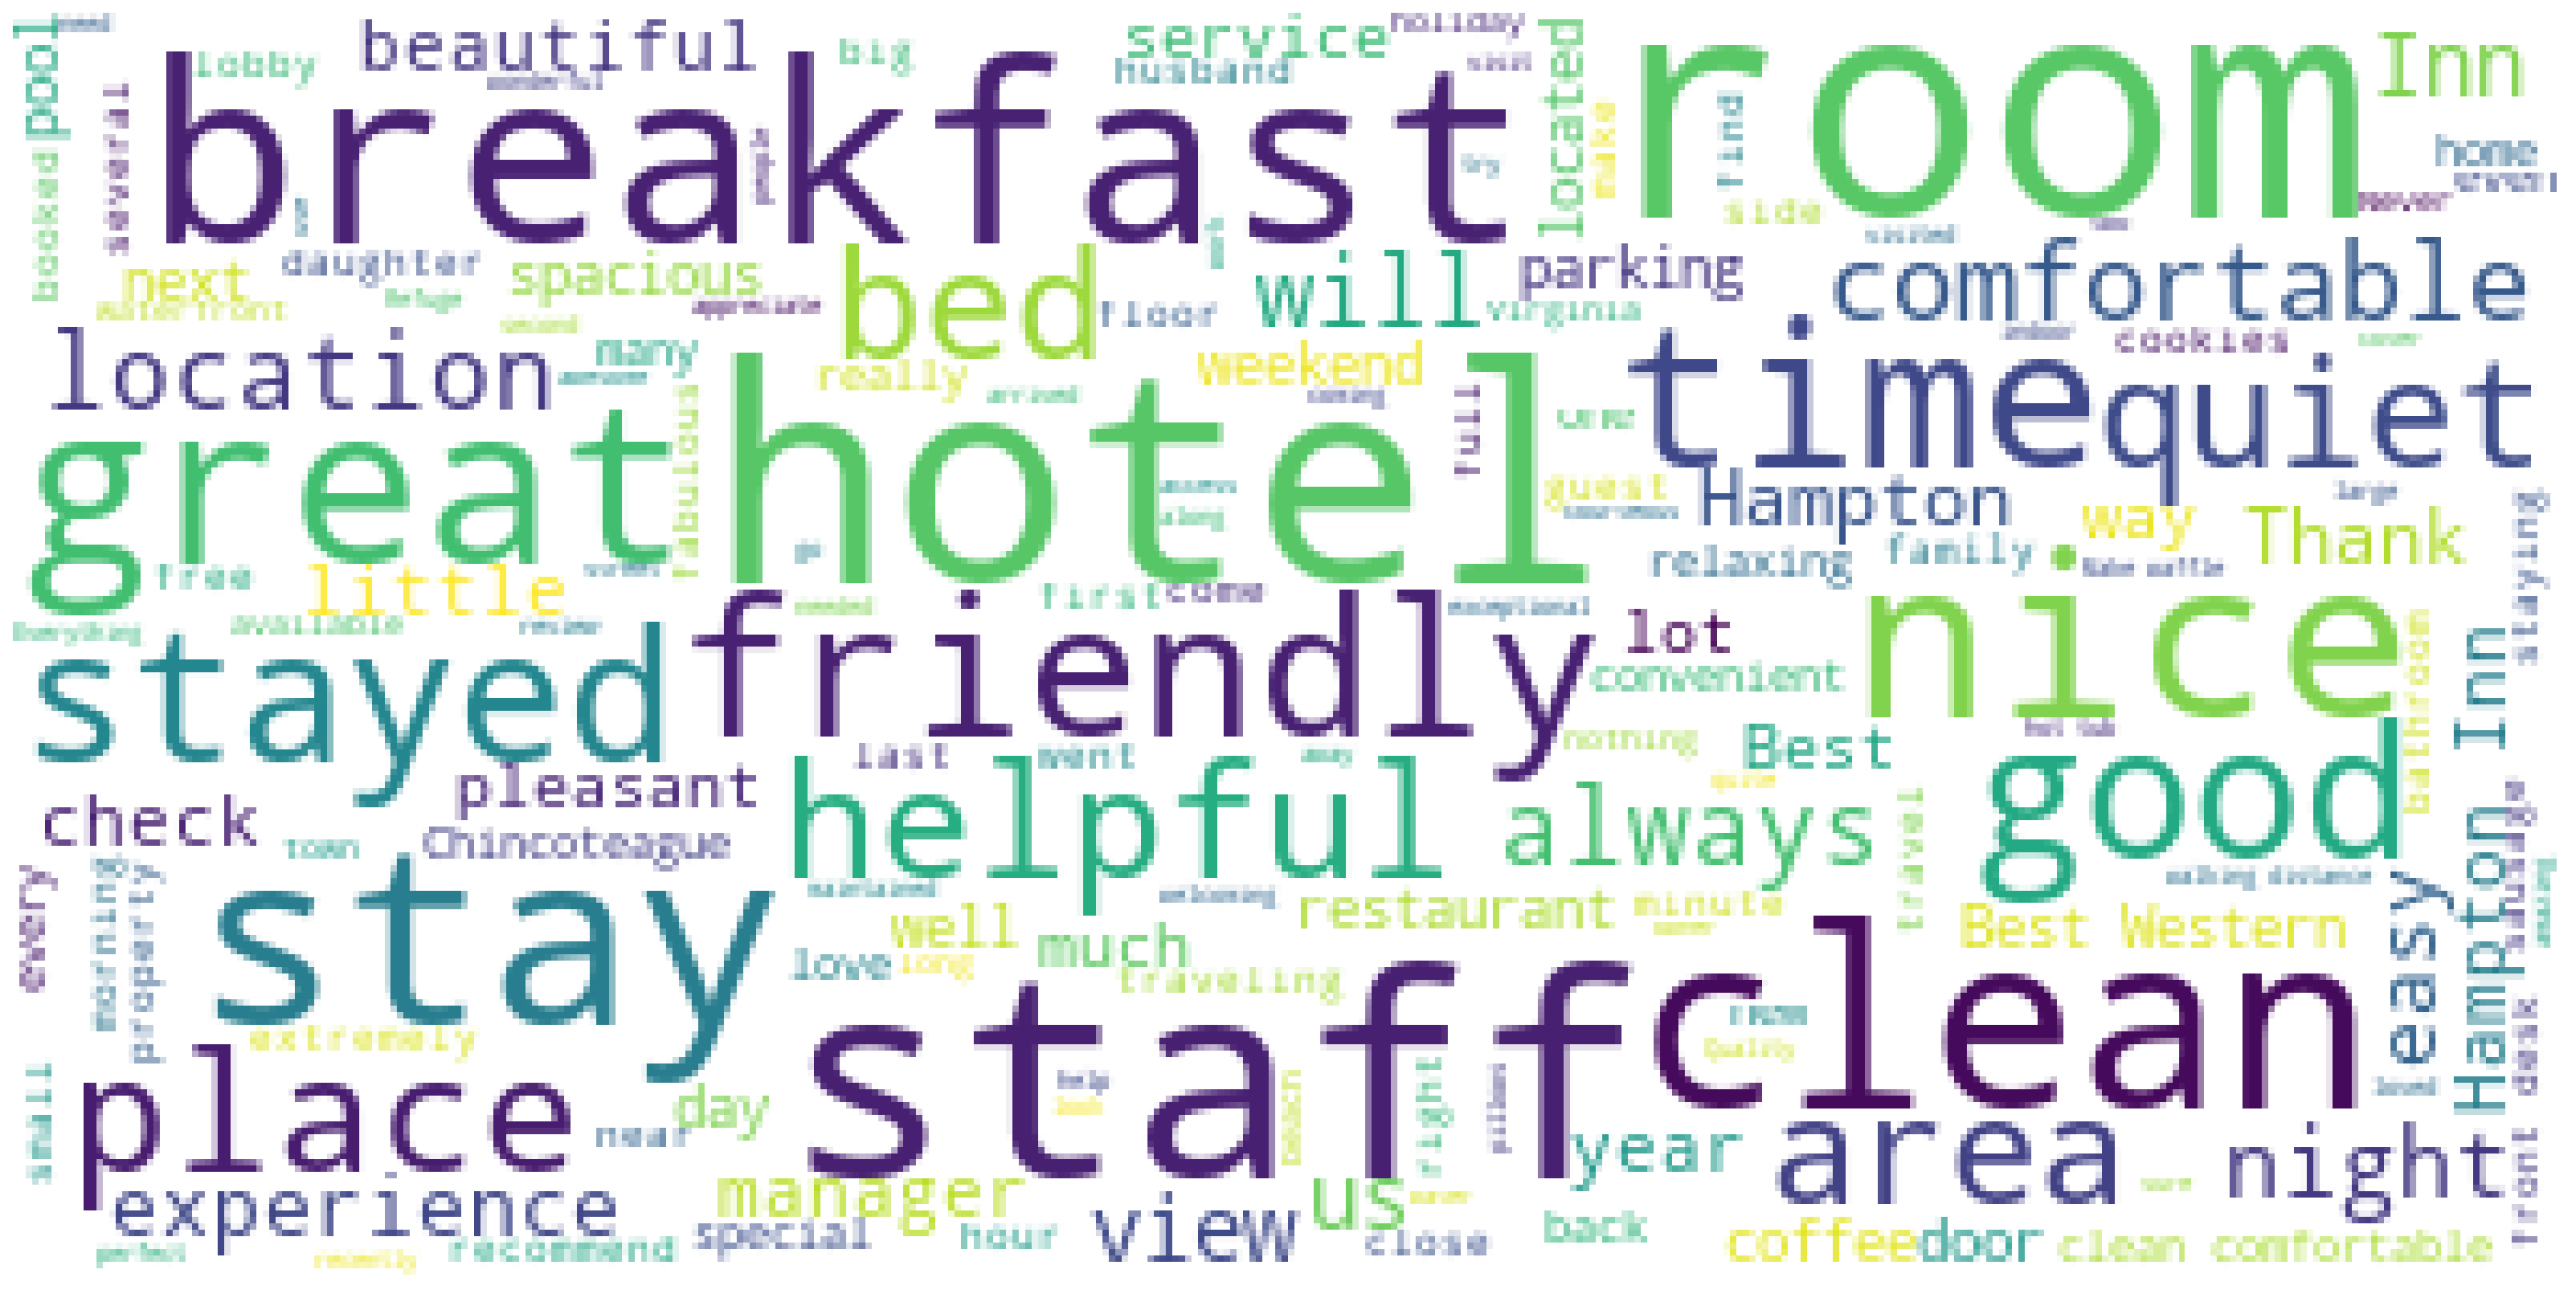

In [49]:
#highly positive reviews
wc(df['reviews.text'][df.polarity>0],'white','Common Words' )

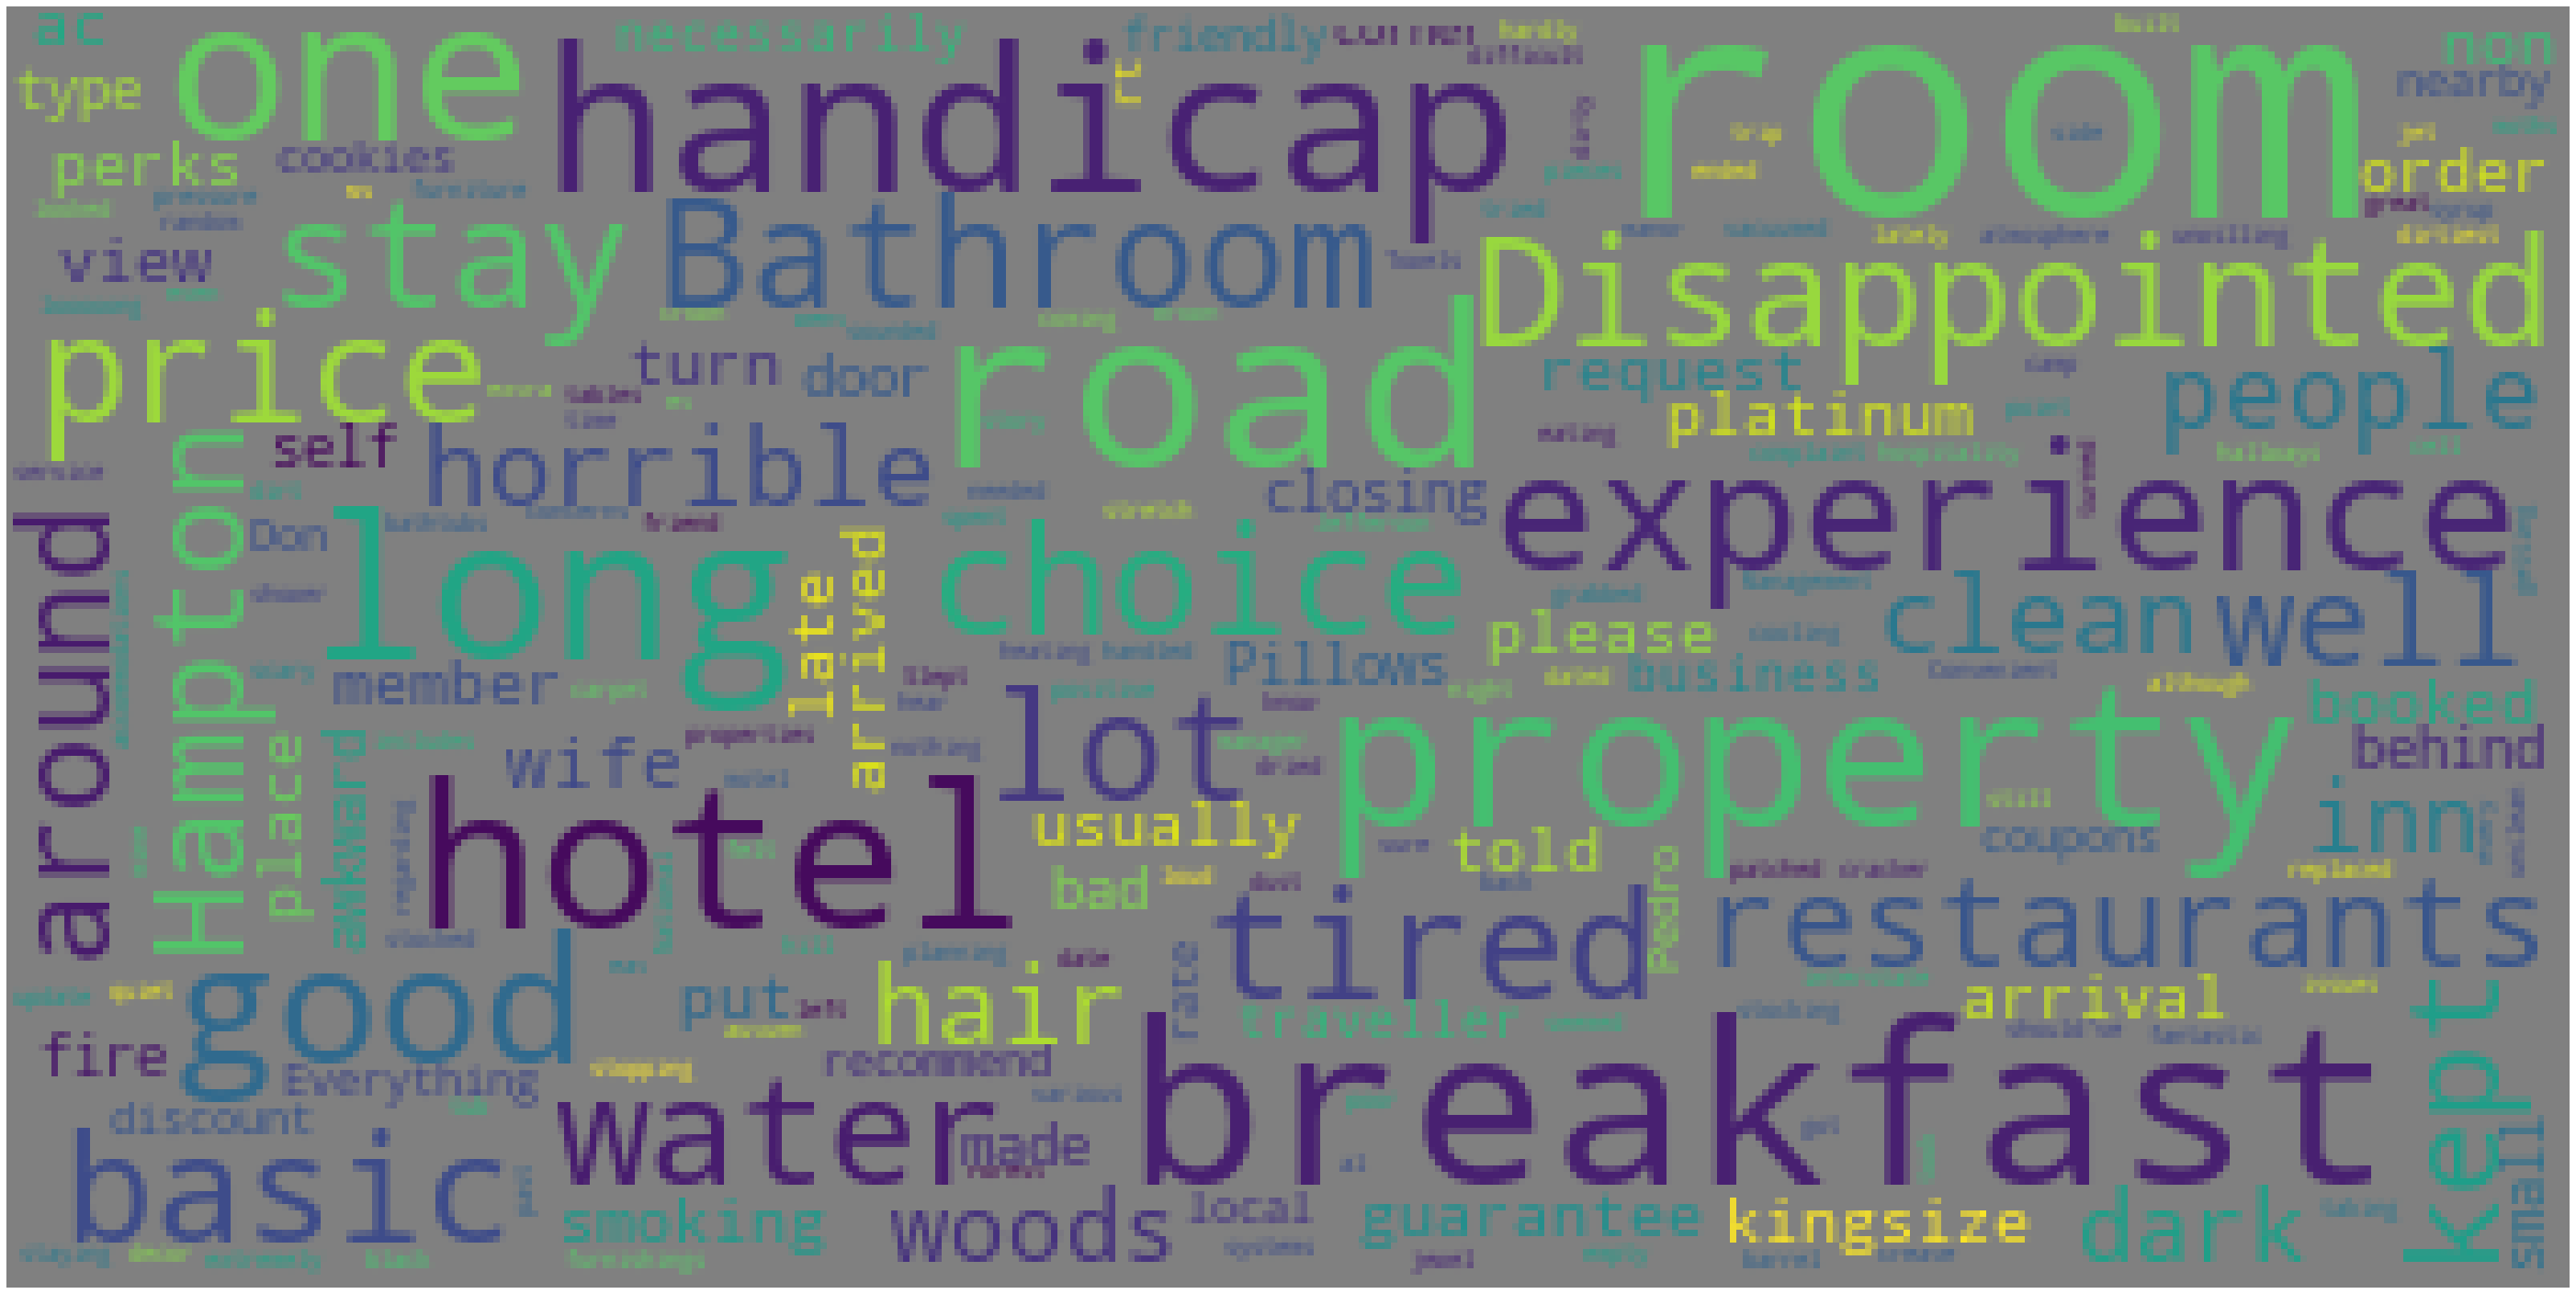

In [50]:
#highly negative reviews
wc(df['reviews.text'][df.polarity<0],'grey','Common Words' )

In [51]:
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 1.0    107
-1.0     10
 0.0      1
Name: polarity, dtype: int64

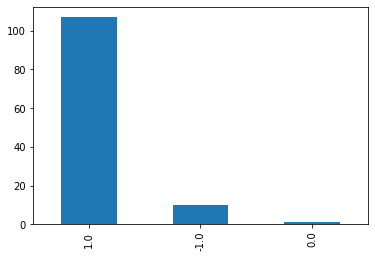

In [52]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()